# County Complete Dataset Analysis

This notebook demonstrates how to use the Linear Regression model to predict the poverty rate based on the high school graduation rate.

## Import Required Libraries

Import the necessary libraries including matplotlib, pandas, numpy, seaborn, and scikit-learn.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression

## Load and Prepare Data

Load the county complete dataset and prepare it for analysis.

In [2]:
# Load the dataset as a DataFrame.
df = pd.read_csv("./data/county_complete.csv")
columns = ["hs_grad_2017", "poverty_2017"]
colors = ["#179E86", "#2580B7", "#9EBE5B", "#C03B26", "#44546A"]

# Drop rows with missing values in the columns of interest.
df = df.dropna(subset=columns)

## Data Distribution Analysis

Create visualizations to understand the distribution of high school graduation rates and poverty rates.

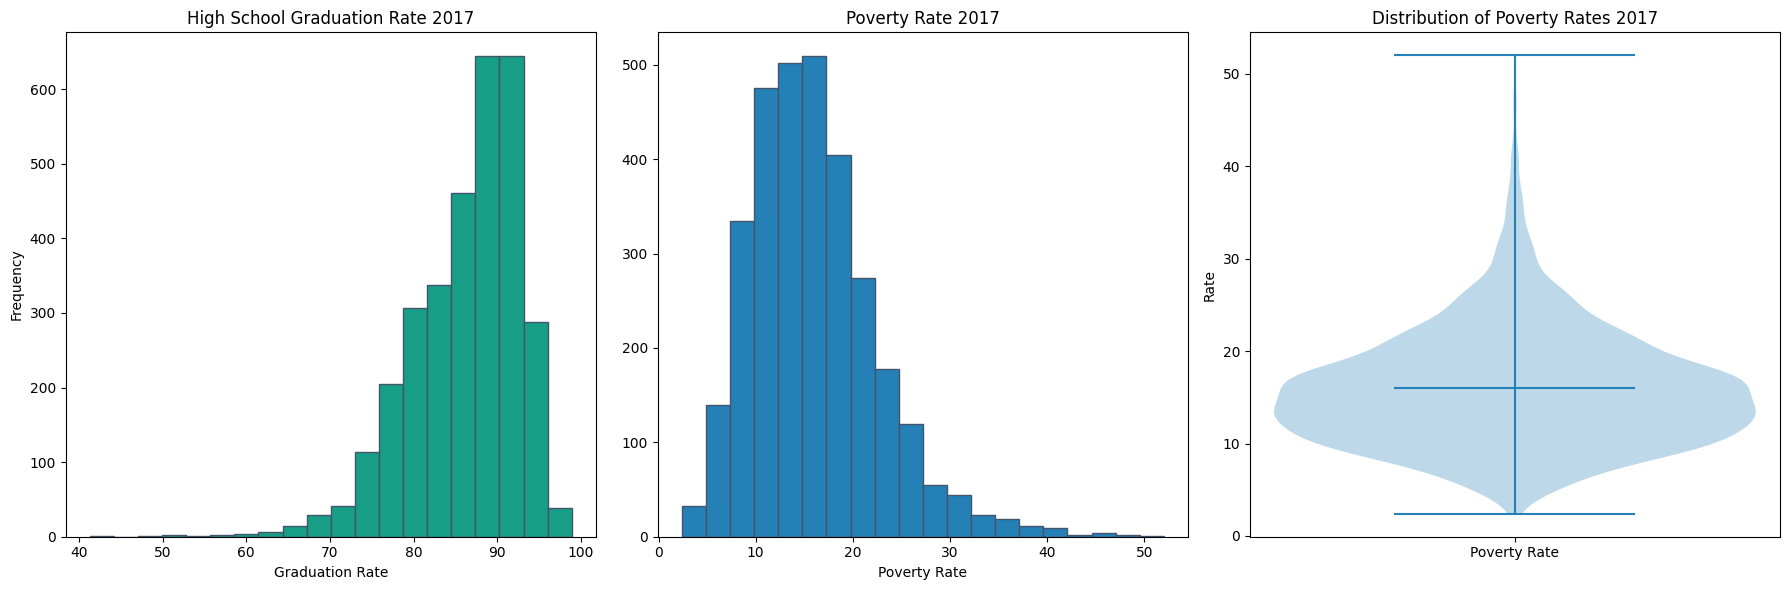

In [3]:
# Create a figure and a set of subplots.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for hs_grad_2017.
axes[0].hist(df[columns[0]], bins=20, color=colors[0], edgecolor=colors[-1])
axes[0].set_title("High School Graduation Rate 2017")
axes[0].set_xlabel("Graduation Rate")
axes[0].set_ylabel("Frequency")

# Histogram for poverty_2017.
axes[1].hist(df[columns[1]], bins=20, color=colors[1], edgecolor=colors[-1])
axes[1].set_title("Poverty Rate 2017")
axes[1].set_xlabel("Poverty Rate")

# Violin plot for poverty_2017.
plots = axes[2].violinplot(df[columns[1]], showmeans=True)

for pc, color in zip(plots["bodies"], colors[1:]):
    pc.set_facecolor(color)

plots["cmeans"].set_colors(colors[1:])
plots["cmaxes"].set_colors(colors[1:])
plots["cmins"].set_colors(colors[1:])
plots["cbars"].set_colors(colors[1:])

axes[2].set_title("Distribution of Poverty Rates 2017")
axes[2].set_xticks([1])
axes[2].set_xticklabels(["Poverty Rate"])
axes[2].set_ylabel("Rate")

plt.tight_layout()
plt.show()

## Scatter Plot Analysis

Create a scatter plot to visualize the relationship between high school graduation rate and poverty rate.

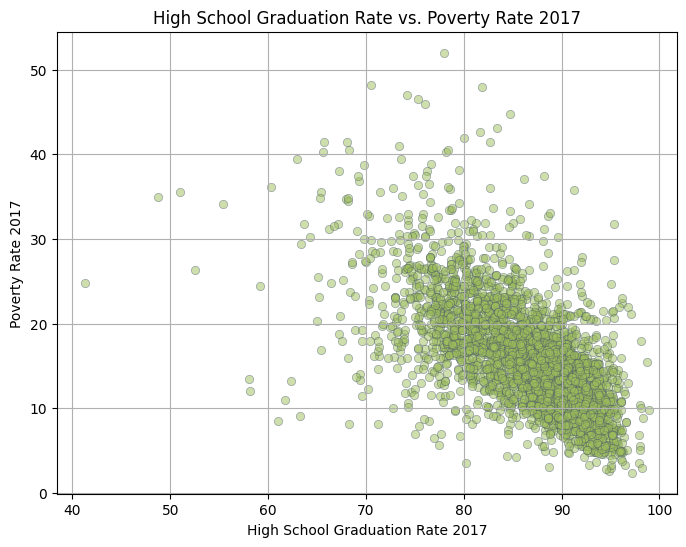

In [4]:
# Scatter plot to show the relation between hs_grad_2017 and poverty_2017.
plt.figure(figsize=(8, 6))
plt.scatter(
    df[columns[0]], df[columns[1]],
    alpha=0.5, c=colors[2], edgecolors=colors[-1], linewidth=0.5)
plt.title("High School Graduation Rate vs. Poverty Rate 2017")
plt.xlabel("High School Graduation Rate 2017")
plt.ylabel("Poverty Rate 2017")
plt.grid(True)
plt.show()

## Linear Regression Model

Prepare the data and fit a linear regression model.

In [5]:
# Prepare the data for linear regression.
X = df[columns[0]].values.reshape(-1, 1)  # High School Graduation Rate
y = df[columns[1]].values  # Poverty Rate

# Create and fit the model.
model = LinearRegression()
model.fit(X, y)

# Predict values.
y_pred = model.predict(X)

## Visualize Regression Line

Plot the data points along with the fitted regression line.

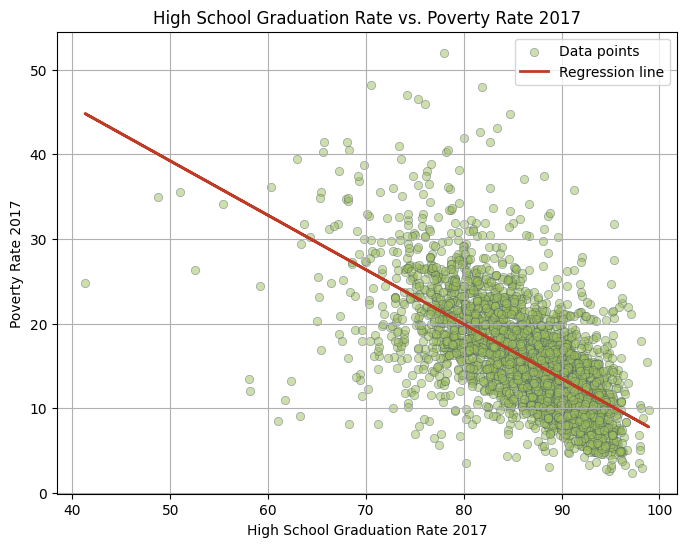

In [6]:
# Plot the data points and the linear regression line.
plt.figure(figsize=(8, 6))
plt.scatter(
    df[columns[0]], df[columns[1]],
    alpha=0.5, c=colors[2], edgecolors=colors[-1], linewidth=0.5,
    label="Data points"
)
plt.plot(
    df[columns[0]], y_pred,
    color=colors[3], linewidth=2, label="Regression line"
)
plt.title("High School Graduation Rate vs. Poverty Rate 2017")
plt.xlabel("High School Graduation Rate 2017")
plt.ylabel("Poverty Rate 2017")
plt.legend()
plt.grid(True)
plt.show()

## Model Evaluation Metrics

Calculate and display key regression metrics including TSS, SSE, and R².

In [7]:
# Print the linear equation.
intercept = model.intercept_
slope = model.coef_[0]
print(f"The linear equation is: y = {slope:.4f}x + {intercept:.4f}.")

# Calculate the Total Sum of Squares (TSS).
tss = ((y - y.mean()) ** 2).sum()
print(f"The Total Sum of Squares (TSS) is: {tss:.4f}.")

# Calculate the Sum of Squared Errors (SSE).
sse = ((y - y_pred) ** 2).sum()
print(f"The Sum of Squared Errors (SSE) is: {sse:.4f}.")

# Calculate the Coefficient of Determination (R^2).
r_squared = (tss - sse) / tss
print(f"The Coefficient of Determination (R^2) is: {r_squared:.4f}.")

The linear equation is: y = -0.6425x + 71.3490.
The Total Sum of Squares (TSS) is: 133263.4739.
The Sum of Squared Errors (SSE) is: 78924.1527.
The Coefficient of Determination (R^2) is: 0.4078.


## Inferential Statistics

Calculate confidence intervals and perform statistical inference.

In [8]:
# Inferential Statistics.
# Degrees of freedom: n-2 because we have two parameters (slope and intercept).
dof = X.shape[0] - 2

# Residual standard error (RSE).
RSE = np.sqrt(sse / dof)
print(f"The Residual Standard Error (RSE): {RSE}.")

# Standard error of the slope and intercept
SE_slope = RSE / np.sqrt(((X - X.mean()) ** 2).sum())
SE_intercept = RSE * np.sqrt(
    (X ** 2).sum() / (X.shape[0] * ((X - X.mean()) ** 2).sum())
)

# 95% confidence interval (two-tailed).
t_critical = stats.t.ppf(1 - 0.025, dof)

# Confidence intervals for slope and intercept.
slope_ci = [ slope - t_critical * SE_slope,
             slope + t_critical * SE_slope ]
intercept_ci = [ intercept - t_critical * SE_intercept,
                 intercept + t_critical * SE_intercept ]
print(f"Slope: {slope}, 95% Confidence Interval: {slope_ci}.")
print(f"Intercept: {intercept}, 95% Confidence Interval: {intercept_ci}.")

The Residual Standard Error (RSE): 5.01508726596318.
Slope: -0.6424824651069103, 95% Confidence Interval: [-0.6695842755980699, -0.6153806546157508].
Intercept: 71.34902094637508, 95% Confidence Interval: [69.00634018261366, 73.6917017101365].


## Visualization with Confidence Interval

Create a scatter plot with regression line and 95% confidence interval using seaborn.

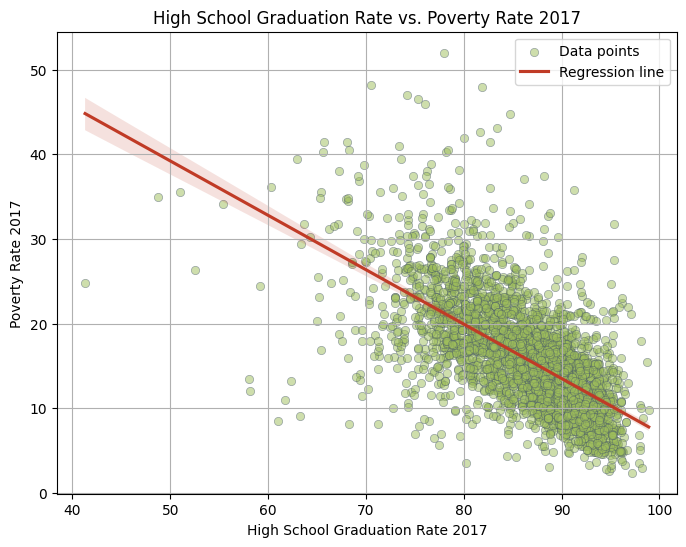

In [9]:
# Scatter plot with regression line and confidence interval using seaborn.
plt.figure(figsize=(8, 6))
sns.regplot(
    x=df[columns[0]], y=df[columns[1]], ci=95, label="Data points",
    scatter_kws={
        "alpha": 0.5,
        "color": colors[2],
        "edgecolor": colors[-1],
        "linewidths": 0.5
    },
    line_kws={
        "color": colors[3],
        "label": "Regression line"
    }
)
plt.title("High School Graduation Rate vs. Poverty Rate 2017")
plt.xlabel("High School Graduation Rate 2017")
plt.ylabel("Poverty Rate 2017")
plt.legend()
plt.grid(True)
plt.show()